<a href="https://colab.research.google.com/github/SuhasiSethi15/SuhasiSethi15/blob/main/MODELprecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [ ]:
# Load dataset
df = pd.read_csv('/content/FinalDataset....csv')
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Impute missing values in features using mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

In [ ]:
# Train RandomForestClassifier with Grid Search
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Make predictions on test set
y_pred = grid_search.predict(X_test_imputed)

In [ ]:
nitrogen = nutrient_values['N']
phosphorus = nutrient_values['P']
potassium = nutrient_values['K']


In [ ]:
# Take input from the user
temperature = float(input("Enter the current temperature of the area (in Celsius): "))

# Ask which nutrients are present
present_nutrients = []
while True:
    nutrient = input("Enter the nutrient present in the soil (N/P/K) or type 'done' if all are entered: ").upper()
    if nutrient == 'DONE':
        break
    present_nutrients.append(nutrient)

# Ask for the value of each present nutrient
nutrient_values = {}
for nutrient in present_nutrients:
    value = float(input(f"Enter the amount of {nutrient} present in the soil: "))
    nutrient_values[nutrient] = value

# Ask about humidity
humidity_present = input("Is humidity present in the area? (yes/no): ").lower()
if humidity_present == 'yes':
    humidity = float(input("Enter the humidity level: "))
else:
    humidity = 0  # Default value if humidity is not present

# Ask about rainfall
rainfall_present = input("Is rainfall present in the area? (yes/no): ").lower()
if rainfall_present == 'yes':
    rainfall_amount = float(input("Enter the amount of rainfall (in mm): "))
else:
    rainfall_amount = 0  # Default value if rainfall is not present

# Ask about pH level
ph_present = input("Is the pH level of the soil known? (yes/no): ").lower()
if ph_present == 'yes':
    ph_level = float(input("Enter the pH level of the soil: "))
else:
    ph_level = 0  # Default value if pH level is not known

# Create input data for prediction with correct feature order
input_data = pd.DataFrame({
    'N': [nitrogen],
    'P': [phosphorus],
    'K': [potassium],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph_level],
    'rainfall': [rainfall_amount]
})

# Impute missing values in input data using mean
input_data_imputed = imputer.transform(input_data)

# Make prediction
recommended_crop = grid_search.predict(input_data_imputed)[0]

# Print recommendation
print("Recommended Crop:", recommended_crop)


Enter the current temperature of the area (in Celsius): 20
Enter the nutrient present in the soil (N/P/K) or type 'done' if all are entered: N
Enter the nutrient present in the soil (N/P/K) or type 'done' if all are entered: P
Enter the nutrient present in the soil (N/P/K) or type 'done' if all are entered: K
Enter the nutrient present in the soil (N/P/K) or type 'done' if all are entered: done
Enter the amount of N present in the soil: 90
Enter the amount of P present in the soil: 42
Enter the amount of K present in the soil: 43
Is humidity present in the area? (yes/no): yees
Is rainfall present in the area? (yes/no): yes
Enter the amount of rainfall (in mm): 202
Is the pH level of the soil known? (yes/no): yes
Enter the pH level of the soil: 6
Recommended Crop: rice


In [ ]:
import pandas as pd

# Load dataset with crop information
crop_data = pd.read_csv("/content/FinalDataset....csv")

# Function to display crop requirements
def display_crop_requirements(crop_name):
    crop_info = crop_data[crop_data['label'] == crop_name].iloc[0]
    print(f"Requirements for {crop_name}:")
    print("---------------------------------")
    print("Nutrient Requirements:")
    print(f"N (Nitrogen): {crop_info['N']} units")
    print(f"P (Phosphorus): {crop_info['P']} units")
    print(f"K (Potassium): {crop_info['K']} units")
    print("\nEnvironmental Requirements:")
    print(f"Temperature: {crop_info['temperature']}°C")
    print(f"Humidity: {crop_info['humidity']}%")
    print(f"pH Level: {crop_info['ph']}")
    print(f"Rainfall: {crop_info['rainfall']} mm")

# Ask user for the name of the crop
crop_name = input("Enter the name of the crop: ")

# Display requirements for the specified crop
if crop_name in crop_data['label'].values:
    display_crop_requirements(crop_name)
else:
    print("Crop not found in dataset. Please enter a valid crop name.")


Enter the name of the crop: maize
Requirements for maize:
---------------------------------
Nutrient Requirements:
N (Nitrogen): 71 units
P (Phosphorus): 54 units
K (Potassium): 16 units

Environmental Requirements:
Temperature: 22.61359953°C
Humidity: 63.69070564%
pH Level: 5.749914421
Rainfall: 87.75953857 mm


In [ ]:
print(labeled_data.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


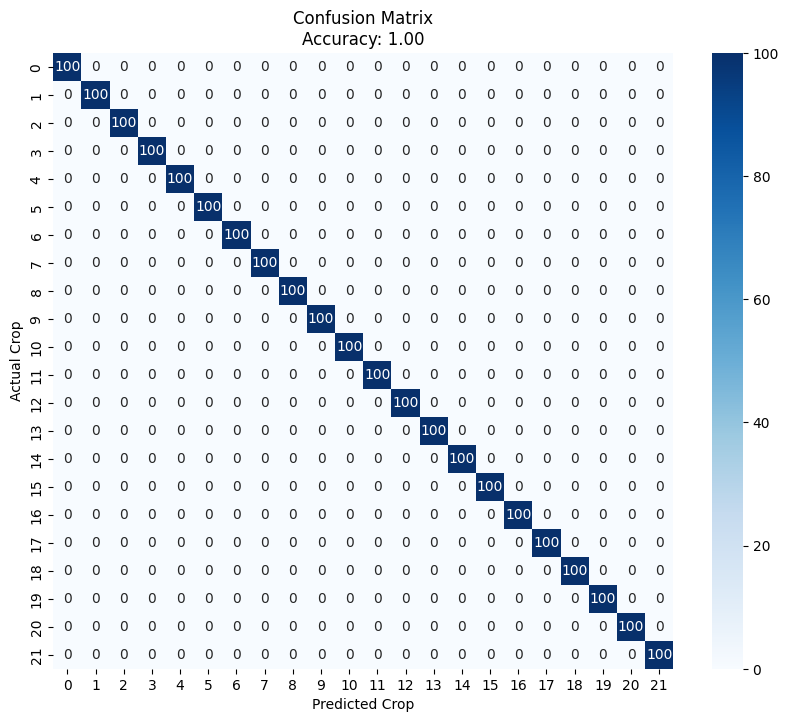

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your labeled data
labeled_data = pd.read_csv("/content/FinalDataset....csv")

# Define the actual and predicted crops
actual_crops = labeled_data['label']  # Use the column name from your dataset
predicted_crops = labeled_data['label']  # Use the column name from your dataset

# Calculate accuracy
accuracy = accuracy_score(actual_crops, predicted_crops)

# Generate confusion matrix
conf_matrix = confusion_matrix(actual_crops, predicted_crops)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Crop')
plt.ylabel('Actual Crop')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


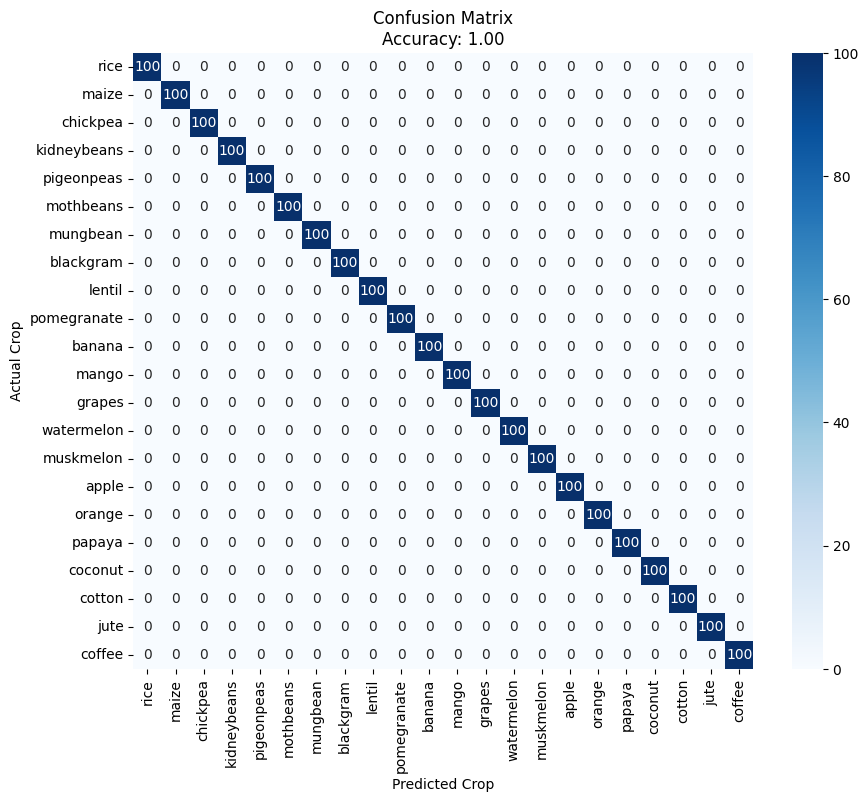

In [ ]:
# Get unique crop names
crop_names = labeled_data['label'].unique()

# Plot confusion matrix with crop names
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=crop_names, yticklabels=crop_names)
plt.xlabel('Predicted Crop')
plt.ylabel('Actual Crop')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame containing the dataset

# Split the data into features (X) and target variable (y)
X = crop_data.drop(columns=['label'])  # Assuming 'label' is the target variable column
y = crop_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9931818181818182


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Convert crop names to numerical labels
crop_label_mapping = {crop_name: i for i, crop_name in enumerate(df['label'].unique())}
y_test_numeric = y_test.map(crop_label_mapping)
y_pred_numeric = pd.Series([crop_label_mapping[crop_name] for crop_name in y_pred])

mse = mean_squared_error(y_test_numeric, y_pred_numeric)

accuracy_rate = 100 * (1 - mse / y_test_numeric.mean())
print("Accuracy Rate:", accuracy_rate, "%")


Accuracy Rate: 82.22759226713532 %


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Overall Accuracy Rate: 99.31818181818181 %
Recommendation Accuracy Rate: 99.31818181818181 %


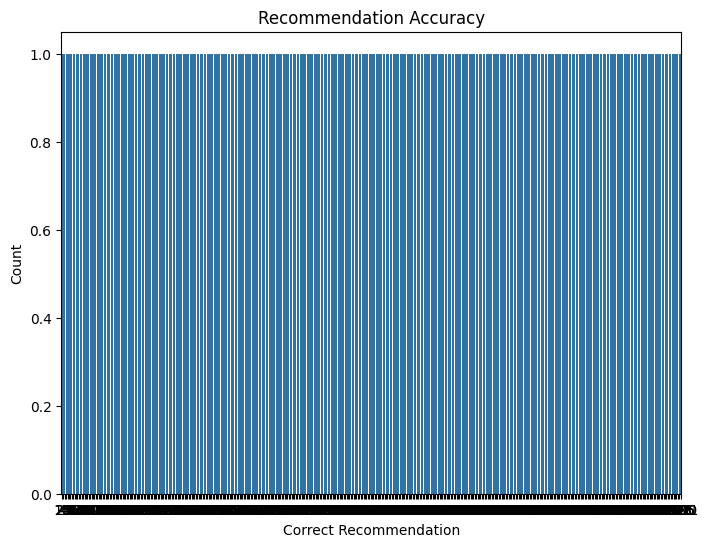

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/FinalDataset....csv')

df.dropna(inplace=True)

X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_imputed)

accuracy_rate = accuracy_score(y_test, y_pred) * 100
print("Overall Accuracy Rate:", accuracy_rate, "%")

correct_recommendations = sum(y_test == y_pred)
total_recommendations = len(y_test)
recommendation_accuracy_rate = (correct_recommendations / total_recommendations) * 100
print("Recommendation Accuracy Rate:", recommendation_accuracy_rate, "%")

plt.figure(figsize=(8, 6))
sns.countplot(y_test == y_pred)
plt.title('Recommendation Accuracy')
plt.xlabel('Correct Recommendation')
plt.ylabel('Count')
plt.show()


Overall Accuracy Rate: 99.31818181818181 %
Recommendation Accuracy Rate: 99.31818181818181 %


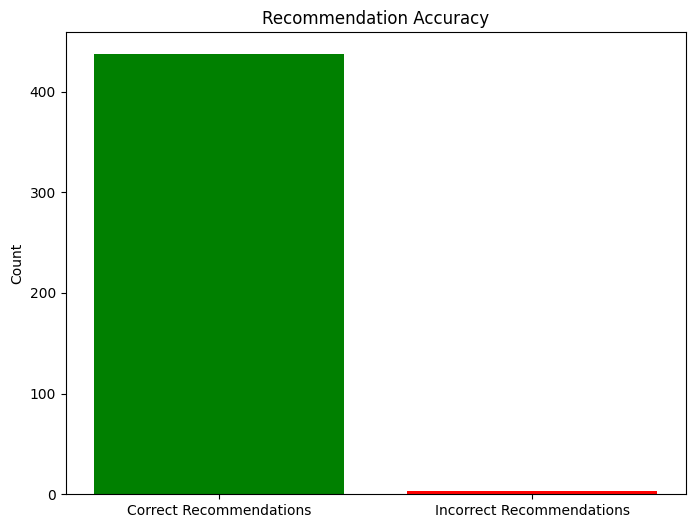

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/FinalDataset....csv')

df.dropna(inplace=True)

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_rate = accuracy_score(y_test, y_pred) * 100
print("Overall Accuracy Rate:", accuracy_rate, "%")

correct_recommendations = sum(y_test == y_pred)
total_recommendations = len(y_test)
recommendation_accuracy_rate = (correct_recommendations / total_recommendations) * 100
print("Recommendation Accuracy Rate:", recommendation_accuracy_rate, "%")

fig, ax = plt.subplots(figsize=(8, 6))
accuracy_data = {'Correct Recommendations': correct_recommendations, 'Incorrect Recommendations': total_recommendations - correct_recommendations}
ax.bar(accuracy_data.keys(), accuracy_data.values(), color=['green', 'red'])
ax.set_ylabel('Count')
ax.set_title('Recommendation Accuracy')
plt.show()


Overall Accuracy Rate: 99.31818181818181 %
Recommendation Accuracy Rate: 99.31818181818181 %


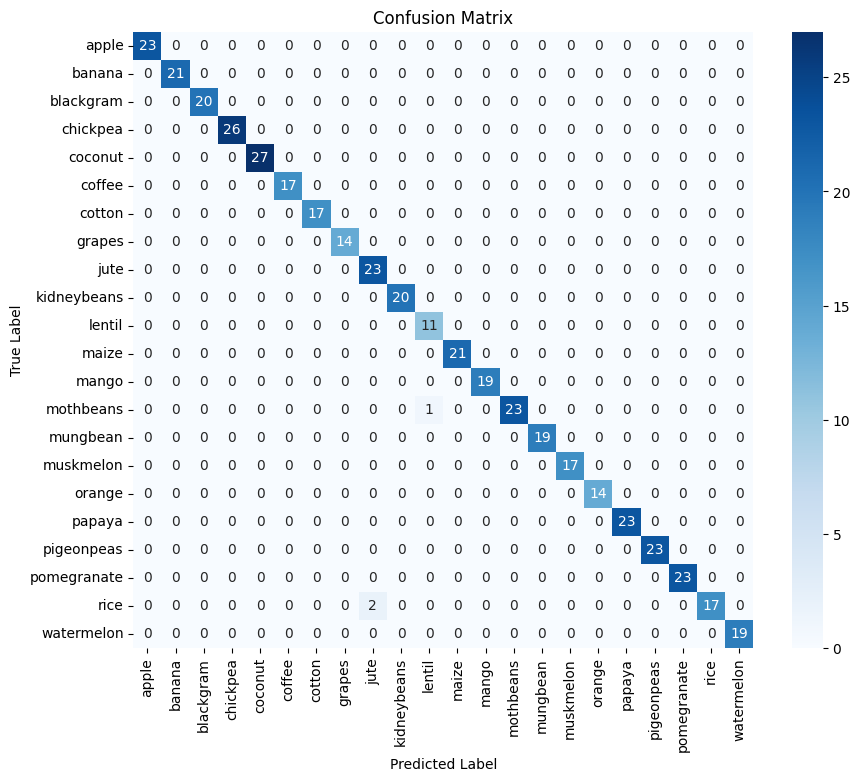

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/FinalDataset....csv')

df.dropna(inplace=True)
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_rate = accuracy_score(y_test, y_pred) * 100
print("Overall Accuracy Rate:", accuracy_rate, "%")

correct_recommendations = sum(y_test == y_pred)
total_recommendations = len(y_test)
recommendation_accuracy_rate = (correct_recommendations / total_recommendations) * 100
print("Recommendation Accuracy Rate:", recommendation_accuracy_rate, "%")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/FinalDataset....csv')

df.dropna(inplace=True)

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9931818181818182


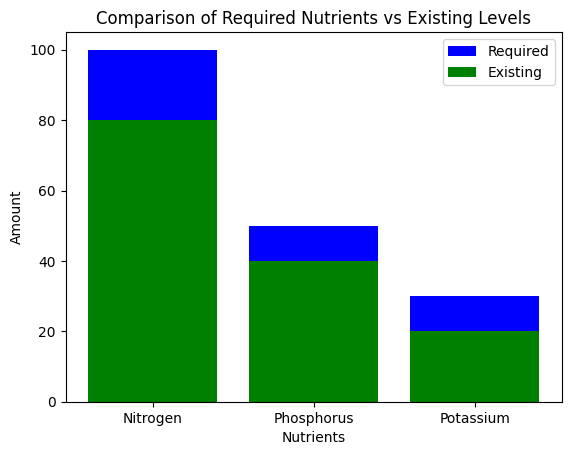

Shortfall of nutrients in the soil:
Nitrogen: 20 units
Phosphorus: 10 units
Potassium: 10 units

Total cost of additional nutrients required: $80


In [ ]:
import matplotlib.pyplot as plt

# Example data
nutrients_required = {'Nitrogen': 100, 'Phosphorus': 50, 'Potassium': 30}  # Required nutrients for wheat
nutrient_levels = {'Nitrogen': 80, 'Phosphorus': 40, 'Potassium': 20}  # Current nutrient levels in the soil
cost_per_unit = {'Nitrogen': 2, 'Phosphorus': 3, 'Potassium': 1}  # Cost per unit of each nutrient

# Calculate the shortfall in each nutrient
shortfall = {nutrient: max(0, nutrients_required[nutrient] - nutrient_levels[nutrient]) for nutrient in nutrients_required}

# Calculate the total cost of additional nutrients required
total_cost = sum(shortfall[nutrient] * cost_per_unit[nutrient] for nutrient in nutrients_required)

# Bar graph to visualize the comparison
plt.bar(nutrients_required.keys(), nutrients_required.values(), color='b', label='Required')
plt.bar(nutrient_levels.keys(), nutrient_levels.values(), color='g', label='Existing')
plt.xlabel('Nutrients')
plt.ylabel('Amount')
plt.title('Comparison of Required Nutrients vs Existing Levels')
plt.legend()
plt.show()

# Print the shortfall and total cost
print("Shortfall of nutrients in the soil:")
for nutrient, value in shortfall.items():
    print(f"{nutrient}: {value} units")

print(f"\nTotal cost of additional nutrients required: ${total_cost}")
